In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
df=pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [2]:
df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# 1.The mean sales generated by each zone.

In [4]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


when we compare sales with zones,the zones are comparatively high.The maximum and minimum zones are 2.36 and 1.23 rspectively.the mean sales is highly for zone D.

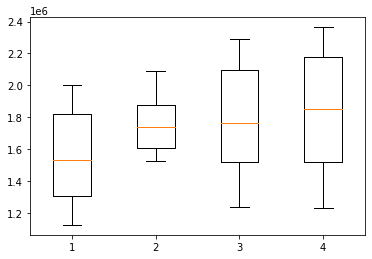

In [5]:
plt.boxplot(x=df[['Zone - A','Zone - B','Zone - C','Zone - D']])
plt.show()

# 2.Total sales generated by all the zones for each month.

In [6]:
df.sum(axis=0) 

Month       Month - 1Month - 2Month - 3Month - 4Month - 5M...
Zone - A                                             44674301
Zone - B                                             50911228
Zone - C                                             51413260
Zone - D                                             53444876
dtype: object

Zone-D is the highest for total sales for each month.

# Alternatively, the  sum each row,


In [7]:
df.sum(axis=1)

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

# 3.Check whether all the zones generate the same amount of sales.

Here consider the one way ANOVA

H0: Null Hypothesis states that all the zones generate the same amount of sales.

H1: Alternative Hypothesis is that the zones are not all same

Level of Significance:0.05

In [9]:
from scipy.stats import f_oneway
F_statistic, pvalue  = f_oneway(df['Zone - A'], df['Zone - B'],df['Zone - C'],df['Zone - D'])
print("The calculated F statistic is :",F_statistic)
print("The P-value is :" ,pvalue)

alpha = 0.05

if pvalue < alpha:
    print("We REJECT the Null Hypothesis")
elif pvalue > alpha:
    print("We're Unable to reject the Null Hypothesis")

The calculated F statistic is : 5.672056106843581
The P-value is : 0.0011827601694503335
We REJECT the Null Hypothesis


Since P value is less than 0.05, we can reject the null hypothesis and conclude that the zones are not all same.